In [40]:
# Imports required Libraries & Tools
import pandas as pd
import numpy as np
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [41]:
# Read the "content_type_new.xlxs" file , then store in a Pandas DataFrame
df_content_type = pd.read_excel(
    Path("./content_type_new.xlsx")
)

# Review the DataFrame
display(df_content_type.head(500))
display(df_content_type.tail(500))

,Gender,Subscription_Plan,Age_Group,Genre,Renewal_Date_within_Days,Content_Division,Categories,Content_Type
0,Male,Regular,16-20,WebSeries,7,Hollywood,Comedy,0
1,Female,Silver,20-30,Movies,15,Latino,Action,1
2,Male,Gold,30-40,Movies,30,Bollywood,SciFi,1
3,Male,Regular,40-50,WebSeries,45,Mandarin,Horror,1
4,Male,Silver,50-60,WebSeries,60,Arabic,Adventure,0
...,...,...,...,...,...,...,...,...
495,Male,Regular,40-50,WebSeries,45,Others,Animated,0
496,Female,Silver,16-20,Movies,7,Bollywood,Musical,1
497,Male,Silver,30-40,Movies,15,Hollywood,Thriller,0
498,Male,Silver,20-30,WebSeries,7,Others,Comedy,1


,Gender,Subscription_Plan,Age_Group,Genre,Renewal_Date_within_Days,Content_Division,Categories,Content_Type
1017669,NaN,Silver,30-40,WebSeries,45,Hollywood,Action,0
1017670,NaN,Silver,16-20,Movies,60,Latino,Action,1
1017671,NaN,Silver,20-30,WebSeries,7,Hollywood,Action,1
1017672,NaN,Gold,40-50,Movies,7,Hollywood,Comedy,1
1017673,NaN,Regular,20-30,WebSeries,15,Latino,Adventure,1
...,...,...,...,...,...,...,...,...
1018164,NaN,Regular,16-20,Movies,45,Hollywood,SciFi,1
1018165,NaN,Regular,50-60,WebSeries,60,Bollywood,SciFi,0
1018166,NaN,Regular,60+,WebSeries,45,Latino,Adventure,0
1018167,NaN,Gold,20-30,Movies,60,Mandarin,Romance,1


In [45]:
# Cleanse the data by dropping NaN Values
df_content_type = df_content_type.dropna()

In [47]:
# Review the data types associated with the columns
df_content_type.dtypes

Gender                      object
Subscription_Plan           object
Age_Group                   object
Genre                       object
Renewal_Date_within_Days     int64
Content_Division            object
Categories                  object
Content_Type                 int64
dtype: object

In [49]:
# Create a list of categorical variables 
categorical_variables = list(df_content_type.dtypes[df_content_type.dtypes == "object"].index)

# Display the categorical variables list
categorical_variables

['Gender',
 'Subscription_Plan',
 'Age_Group',
 'Genre',
 'Content_Division',
 'Categories']

In [50]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

In [51]:
# Encode the categorcal variables using OneHotEncoder
encoded_data = enc.fit_transform(df_content_type[categorical_variables])

In [52]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names(categorical_variables)
)

# Display the DataFrame
display(encoded_df.head())

,Gender_Female,Gender_Male,Subscription_Plan_Gold,Subscription_Plan_Gole,Subscription_Plan_Regular,Subscription_Plan_Regular,Subscription_Plan_Silver,Age_Group_16-20,Age_Group_20-30,Age_Group_30-40,...,Categories_Action,Categories_Adventure,Categories_Animated,Categories_Comedy,Categories_Fantasy,Categories_Horror,Categories_Musical,Categories_Romance,Categories_SciFi,Categories_Thriller
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
encoded_df = pd.concat([
    df_content_type.drop(columns=categorical_variables),
    encoded_df,
], axis=1)

# Review the Dataframe
encoded_df.head()

,Renewal_Date_within_Days,Content_Type,Gender_Female,Gender_Male,Subscription_Plan_Gold,Subscription_Plan_Gole,Subscription_Plan_Regular,Subscription_Plan_Regular,Subscription_Plan_Silver,Age_Group_16-20,...,Categories_Action,Categories_Adventure,Categories_Animated,Categories_Comedy,Categories_Fantasy,Categories_Horror,Categories_Musical,Categories_Romance,Categories_SciFi,Categories_Thriller
0,7,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,45,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,60,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# Define the target set y using the "Content_Type" column
y = encoded_df["Content_Type"]

# Display a sample of y
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Content_Type, dtype: int64

In [55]:
# Define features set X by selecting all columns but "Content_Type"
X = encoded_df.drop(columns=["Content_Type"])

# Review the features DataFrame
display(X.head())
display(X.tail())

,Renewal_Date_within_Days,Gender_Female,Gender_Male,Subscription_Plan_Gold,Subscription_Plan_Gole,Subscription_Plan_Regular,Subscription_Plan_Regular,Subscription_Plan_Silver,Age_Group_16-20,Age_Group_20-30,...,Categories_Action,Categories_Adventure,Categories_Animated,Categories_Comedy,Categories_Fantasy,Categories_Horror,Categories_Musical,Categories_Romance,Categories_SciFi,Categories_Thriller
0,7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,45,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,60,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Renewal_Date_within_Days,Gender_Female,Gender_Male,Subscription_Plan_Gold,Subscription_Plan_Gole,Subscription_Plan_Regular,Subscription_Plan_Regular,Subscription_Plan_Silver,Age_Group_16-20,Age_Group_20-30,...,Categories_Action,Categories_Adventure,Categories_Animated,Categories_Comedy,Categories_Fantasy,Categories_Horror,Categories_Musical,Categories_Romance,Categories_SciFi,Categories_Thriller
1032,45,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1033,7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1034,7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1035,60,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1036,15,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [77]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [78]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features


32

In [79]:
# Define the number of neurons in the output layer
number_output_neurons = 1

# Review the number of neurons in the output layer
number_output_neurons

1

In [80]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 =  (number_input_features + 1) // 2 

# Review the number hidden nodes in the first layer
hidden_nodes_layer1

16

In [81]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 = (hidden_nodes_layer1 + 1) // 2

# Review the number hidden nodes in the second layer
hidden_nodes_layer2

8

In [82]:
# Create the Sequential model instance
nn = Sequential()


# Add the first hidden layer
nn.add(Dense(
    units=hidden_nodes_layer1, 
    input_dim=number_input_features, 
    activation="relu")
)


# Add the second hidden layer
nn.add(Dense(
    units=hidden_nodes_layer2, 
    activation="relu")
)


# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(
    1, 
    activation="sigmoid")
)

In [83]:
# Display the Sequential model summary
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________


In [84]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [90]:
# Fit the model using 100 epochs and the training data
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4584 - accuracy: 0.7709
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4575 - accuracy: 0.7696
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4576 - accuracy: 0.7658
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4552 - accuracy: 0.7735
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4541 - accuracy: 0.7773
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4535 - accuracy: 0.7773
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4512 - accuracy: 0.7761
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4495 - accuracy: 0.7761
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4485 - accuracy: 0.7851
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4467 - accuracy: 0.7812
Epoch 11/

25/25 [==============================] - 0s 2ms/step - loss: 0.3714 - accuracy: 0.8250
Epoch 84/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3707 - accuracy: 0.8237
Epoch 85/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3699 - accuracy: 0.8198
Epoch 86/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3702 - accuracy: 0.8224
Epoch 87/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3674 - accuracy: 0.8198
Epoch 88/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3669 - accuracy: 0.8250
Epoch 89/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3657 - accuracy: 0.8237
Epoch 90/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3650 - accuracy: 0.8263
Epoch 91/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3645 - accuracy: 0.8250
Epoch 92/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3632 - accuracy: 0.8211
Epoch 93/100


In [91]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

9/9 - 0s - loss: 1.2606 - accuracy: 0.5269
Loss: 1.2605643272399902, Accuracy: 0.5269230604171753


In [92]:
# Create a DataFrame using the model history and an index parameter
model_plot = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"]) + 1))

<AxesSubplot:>

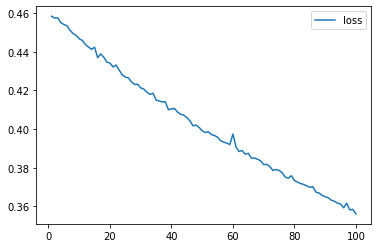

In [93]:
# Vizualize the model plot where the y-axis displays the loss metric
model_plot.plot(y="loss")

<AxesSubplot:>

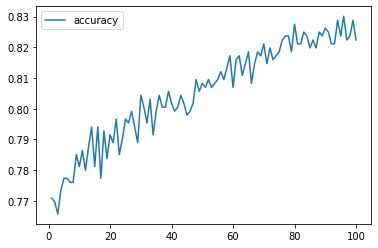

In [94]:
# Vizualize the model plot where the y-axis displays the accuracy metric
model_plot.plot(y="accuracy")